### Installation the required libraries

In [2]:
!pip install transformers diffusers accelerate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.0/852.0 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.6 MB/s eta 0:00:00


### Load the StableDiffusion Pipeline to use for Image Generation

In [3]:
from diffusers import StableDiffusionPipeline
import torch

### Define the Model Path - https://huggingface.co/prompthero/midjourney-v4-diffusion

In [4]:
model_path = 'prompthero/midjourney-v4-diffusion'

### Start Downloading the Fine-tuned Model (Took about 7 mins)

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(model_path , torch_dtype=torch.float16)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


### Move the Models to GPU if GPU is available 

In [6]:
!nvidia-smi

Thu Apr 20 11:53:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

device = "GPU 🔥" if torch.cuda.is_available() else "CPU 🥶"

In [8]:
device

'GPU 🔥'

### Prompt

In [57]:
base_prompt = "Shah Rukh Khan with yellow eyes, pretty detailed eyes, full body. City background. posture by j scott campbell, perfect shading, soft studio lighting, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting"  #@param {type:"string"}

In [60]:
#base_prompt = 'Close up potrait of Shah Rukh Khan, a glossy white, black, red, ivory porcelain face, mechanical features, cybernetic eyes, baroque, rococo, anodized titanium highly detailed mechanisms, gears, fiber, cogs, bulbs, wires, cables, 70mm, Canon EOS 6D Mark II, 4k, 35mm (FX, Full-Frame), f/2.5, extremely detailed, very high details, photorealistic, hi res, hdr, UHD, hyper-detailed, ultra-realistic, vibrant, centered, vivid colors, Wide angle, zoom out'

In [59]:
prompt = "mdjrny-v4 style " + base_prompt

In [58]:
prompt

'mdjrny-v4 style Amitabh Bachchan with yellow eyes, pretty detailed eyes, full body. City background. posture by j scott campbell, perfect shading, soft studio lighting, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting'

In [61]:
result = pipe(
      prompt,  
      width = 512,
      height = 512)

  0%|          | 0/50 [00:00<?, ?it/s]

phantasmal iridescent portrait of awoman, detailed, colourful, psychedelic, unreal engine, octane render, blender effect

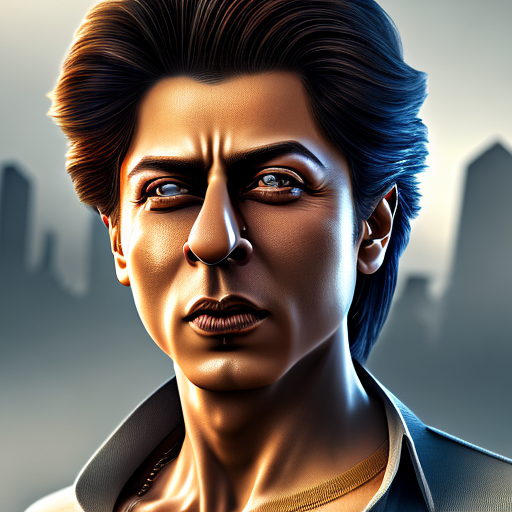

In [62]:
image = result.images[0]  
    
image.save("sd_img.png")

image

a beautiful anime cyborg girl with yellow eyes wearing a cat hoodie, pretty detailed eyes, full body. City background. posture by j scott campbell, perfect shading, soft studio lighting, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting

Full body view of a Samurai warrior in the year 2432, 4k upscale, with London background, raining

distant lightning storm

A corgi riding a bike, ASCII art

Close-up Portrait of a cyborg geisha, a glossy white, black, red, ivory porcelain face, mechanical features, cybernetic eyes, baroque, rococo, anodized titanium highly detailed mechanisms, gears, fiber, cogs, bulbs, wires, cables, 70mm, Canon EOS 6D Mark II, 4k, 35mm (FX, Full-Frame), f/2.5, extremely detailed, very high details, photorealistic, hi res, hdr, UHD, hyper-detailed, ultra-realistic, vibrant, centered, vivid colors, Wide angle, zoom out

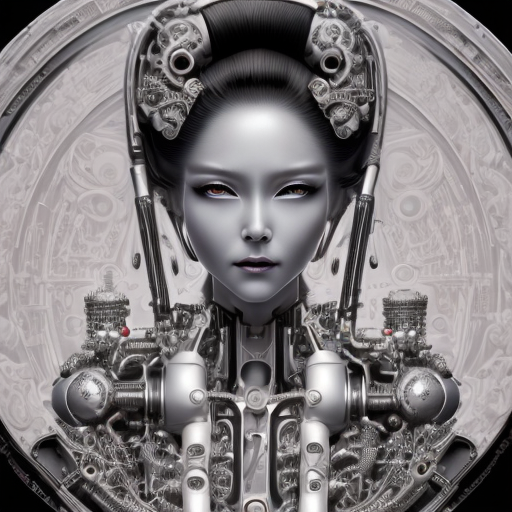

In [ ]:
image = result.images[0]  
    
image.save("sd_img.png")

image

.

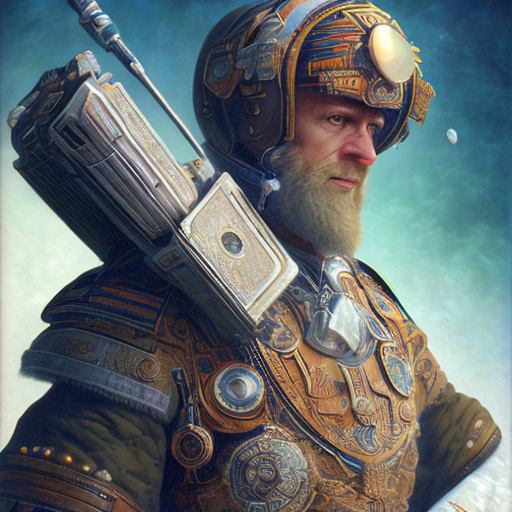

In [ ]:
image = result.images[0]  
    
image.save("sd_img.png")

image

"Woman in Kimono" + "detailed, soft ambiance, japanese influence, unreal engine 5, octane render" + Remaster.

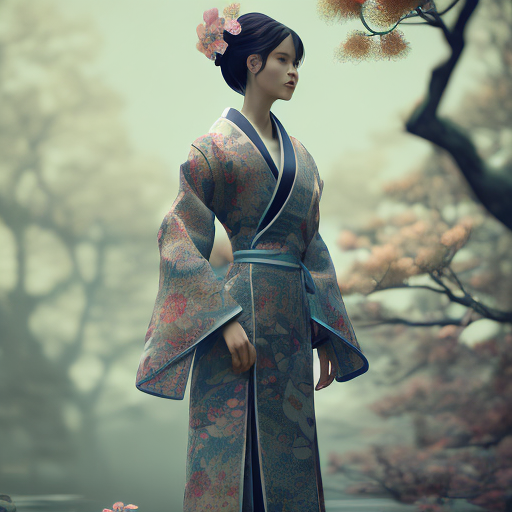

In [ ]:
image = result.images[0]  
    
image.save("sd_img.png")

image

a beautiful anime cyborg girl with yellow eyes wearing a cat hoodie, pretty detailed eyes, full body. City background. posture by j scott campbell, perfect shading, soft studio lighting, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting --v 4

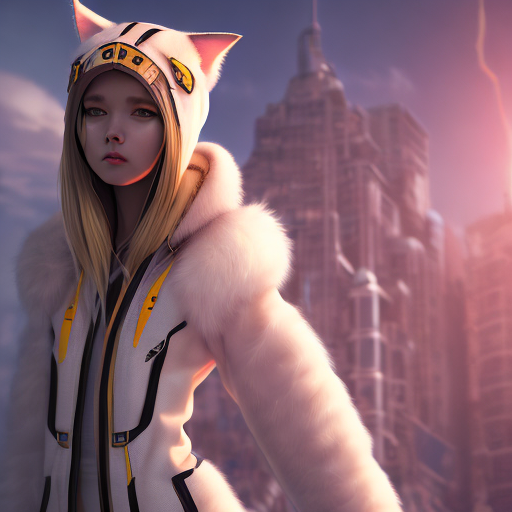

In [ ]:
image = result.images[0]  
    
image.save("sd_img.png")

image